# PWAについて

Progressive Web Appsの略

Native Appに近いユーザ体験を目指す、ウェブサイトの作り方。

progressive：段階的。  
それから部分的に対応していくことが可能

最終的には：

- ホーム画面に追加してスタート画面を表示するなど
- 読み込みが早く、オフラインで動く
- Push通知ができる

一度にすべてをやる必要はなく、manifest.jsonだけを追加してホーム画面に追加することができる。  
Push通知は基本的にServiceWorker+WebPushの仕組み。  
（完全にオフライン対応せず）ServiceWorkerでコンテンツの一部をキャッシュで扱って読み込み速度を上げる。  
などでも十分な効果が期待できる。

## モチベーション、なぜPWA

モバイルユーザの時間は8割前後アプリに使われる、  
が、そのうち大半の時間はトップ３のアプリをつかっている。  

**インストールしてもらってもトップ３に入れないアプリよりもウェブサイトの方がいいかもしれない。**


ユーザの月間平均使用数、  
アプリ：20、ウェブサイト：100

ウェブサイトのユーザ獲得コストはアプリよりずっと安い

情報源：https://html5experts.jp/agektmr/20527/

ウェブならの利点
- 開発メンテナンスコスト
- ストアの審査
- 検索エンジンへ対応

## 現状

ブラウザの対応状況：

|ブラウザ |状況 |
|:-----------|------------:|
|Google Chrome|対応|  
|Firefox|部分対応|  
|Safari|開発中 | 

Androidは使えるけど、iphtonはだめ  
（読み込み速度向上などでiphoneユーザにも一定の効果を発揮したケースも。情報源：https://www.youtube.com/watch?v=_ZBcoKidTew ）。

safariが対応すれば（iphoneで使えれば）本格化する可能性が大きい

導入状況：

- SUUMO
- Twitter Lite
- ...

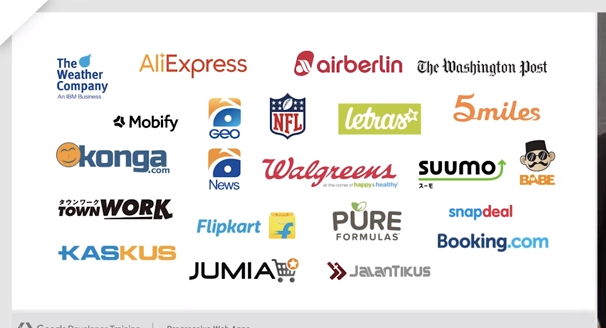

# ホーム画面追加

# プッシュ通知

# ServiceWorker

三秒以内にページが表示されないとほとんどのユーザはページを閉じる。

⇒ServiceWorker

情報源：https://www.youtube.com/watch?v=_ZBcoKidTew

## Workbox

### **CacheExpiration**

キャッシュ保持期限・個数の設定(Handlerごと)  
https://developers.google.com/web/tools/workbox/reference-docs/latest/module-workbox-cache-expiration.CacheExpiration

- maxEntries: キャッシュ数の上限（数を超えると古いものから削除される）
- maxAgeSeconds: キャッシュ保持時間（時間を超えると、次に呼び出される時に削除される）

Handlerごとに設定するので、細かなコントロールが可能

### Strategies

キャッシュ管理方法  
https://developers.google.com/web/tools/workbox/reference-docs/latest/module-workbox-sw.Strategies#.StrategyOptions

- cacheFirst
- cacheOnly
- networkFirst
- networkOnly
- staleWhileRevalidate  

を指定できる


パラメータとして

- cacheName
- cacheExpiration
- cacheableResponse
- ...

などを設定できる

## ページとServiceworkerの通信

ServiceWorkerはページオブジェクトから隔離されている。連動させるには「PostMessage」が必要。


「publisher logo Building Progressive Web Apps」by Tal Ater Published by O'Reilly Media, Inc., 2017

ページからSWへ送信：  
```
navigator.serviceWorker.controller.postMessage(
  {arrival: "05/11/2022", nights: 3, guests: 2}
)
```

SW側の受信：
```
self.addEventListener("message", function (event) {
  console.log(event.data);
});
```



SWからページへ：  
```
self.clients.matchAll().then(function(clients) {
  clients.forEach(function(client) {
    if (client.url.includes("/my-account")) {
      client.postMessage("Hi client: "+client.id);
    }
  });
});
```

ページ側の受信：  
```
navigator.serviceWorker.addEventListener("message", function (event) {
  console.log(event.data);
});
```